The dataset used is from a ML challenge on Hackerrank.

Link - https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/

This is a Regression based supervised learning problem.

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import catboost as cb
import xgboost as xgb
import lightgbm as lgbm
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.ensemble import VotingRegressor
%matplotlib inline

In [ ]:
# imoporting dataset 
data = pd.read_csv('train.csv')

data.drop(columns=['tracking_id'], axis=1, inplace= True) #dropping unnecessary columns at an initial phase


In [ ]:
data.isnull().sum()

datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [ ]:
data.describe()

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
count     27927.000000                 24750.000000           28198.000000   
mean         69.037071                     0.383727              40.085387   
std          76.275645                    44.278534              27.204430   
min        -496.211029                   -99.000000             -99.000000   
25%          20.883502                     7.948900              41.633238   
50%          93.302129                    16.102410              43.686082   
75%          95.268058                    23.687285              45.673685   
max         601.455670                    80.217444             169.820455   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
count     27984.000000             28199.000000            28188.000000   
mean         -9.654038                41.027755               42.614239   
std          47.918161                43.663605                6.124546   
min        -146.259543              -244.974098                3.167151   
25%          -1.197652                40.557952               41.911365   
50%          -0.495608                43.221735               43.525297   
75%           5.495030                45.879425               45.174246   
max         165.932123               999.000000               50.000000   

       motor_torque(N-m)  generator_temperature(°C)  \
count       28176.000000               28188.000000   
mean         1710.819803                  65.027857   
std           827.205537                  19.816499   
min           500.000000                  33.893779   
25%           870.340239                  41.198509   
50%          2031.849540                  70.729533   
75%          2462.585729                  78.945849   
max          3000.000000                 100.000000   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
count                  2.549300e+04          28200.000000   
mean                   5.318506e+04             32.735091   
std                    1.875036e+05              7.703391   
min                   -1.188624e+06            -30.000000   
25%                    1.679492e+04             27.311644   
50%                    1.819113e+04             32.605195   
75%                    1.181133e+05             38.232387   
max                    1.272552e+06             55.000000   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
count                   25837.000000       23097.000000     28199.000000   
mean                       20.799761         306.888883      1575.560011   
std                        54.356431         134.055900       483.326394   
min                      -999.000000           0.000000     -1005.222988   
25%                        40.448386         238.627752      1268.134043   
50%                        42.786832         271.427656      1678.238404   
75%                        44.494543         404.153517      1829.054007   
max                       323.000000         569.966479      4693.481933   

       rotor_torque(N-m)  blade_length(m)  blade_breadth(m)  \
count       27628.000000     23107.000000      28200.000000   
mean           25.849894         2.254034          0.397249   
std            32.423943        11.275602          0.061158   
min          -136.732217       -99.000000          0.200111   
25%            13.722808         2.544859          0.347445   
50%            32.977192         3.453333          0.398591   
75%            41.550520         4.357862          0.449354   
max           236.883264        18.209800          0.499975   

       windmill_height(m)  windmill_generated_power(kW/h)  
count        27657.000000                    27993.000000  
mean            25.887052                        6.130529  
std              7.773609                        2.697520  
min            -30.295253                        0.962305  
25%             24.447658    

<AxesSubplot:>

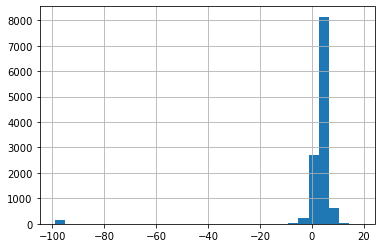

In [ ]:
data['blade_length(m)'].hist(bins=30)

<AxesSubplot:>

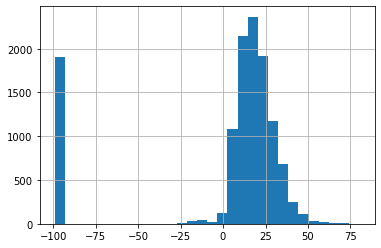

In [ ]:
data['atmospheric_temperature(°C)'].hist(bins=30)

<AxesSubplot:>

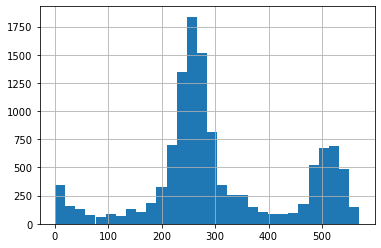

In [ ]:
data['wind_direction(°)'].hist(bins=30)

<AxesSubplot:>

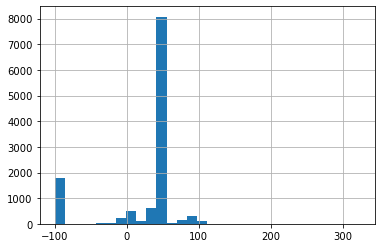

In [ ]:
data['windmill_body_temperature(°C)'].hist(bins=30)

<AxesSubplot:>

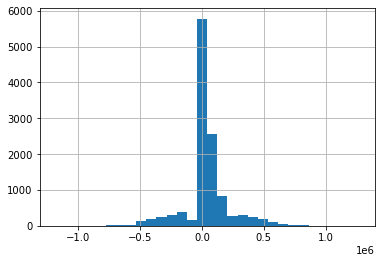

In [ ]:
data['atmospheric_pressure(Pascal)'].hist(bins=30)

<AxesSubplot:>

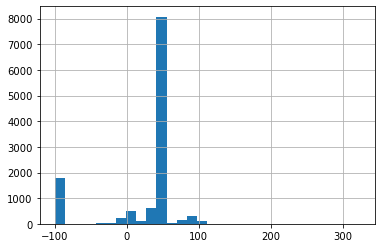

In [ ]:
data['windmill_body_temperature(°C)'].hist(bins=30)

<AxesSubplot:>

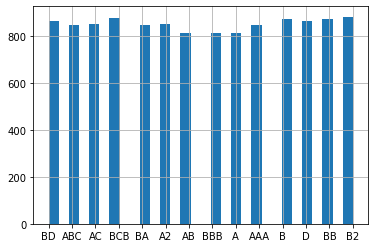

In [ ]:
data['turbine_status'].hist(bins=30)

<AxesSubplot:>

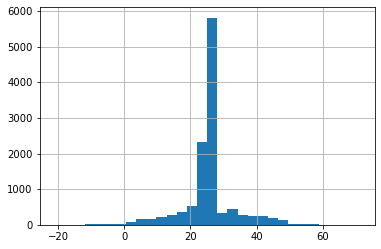

In [ ]:
data['windmill_height(m)'].hist(bins=30)

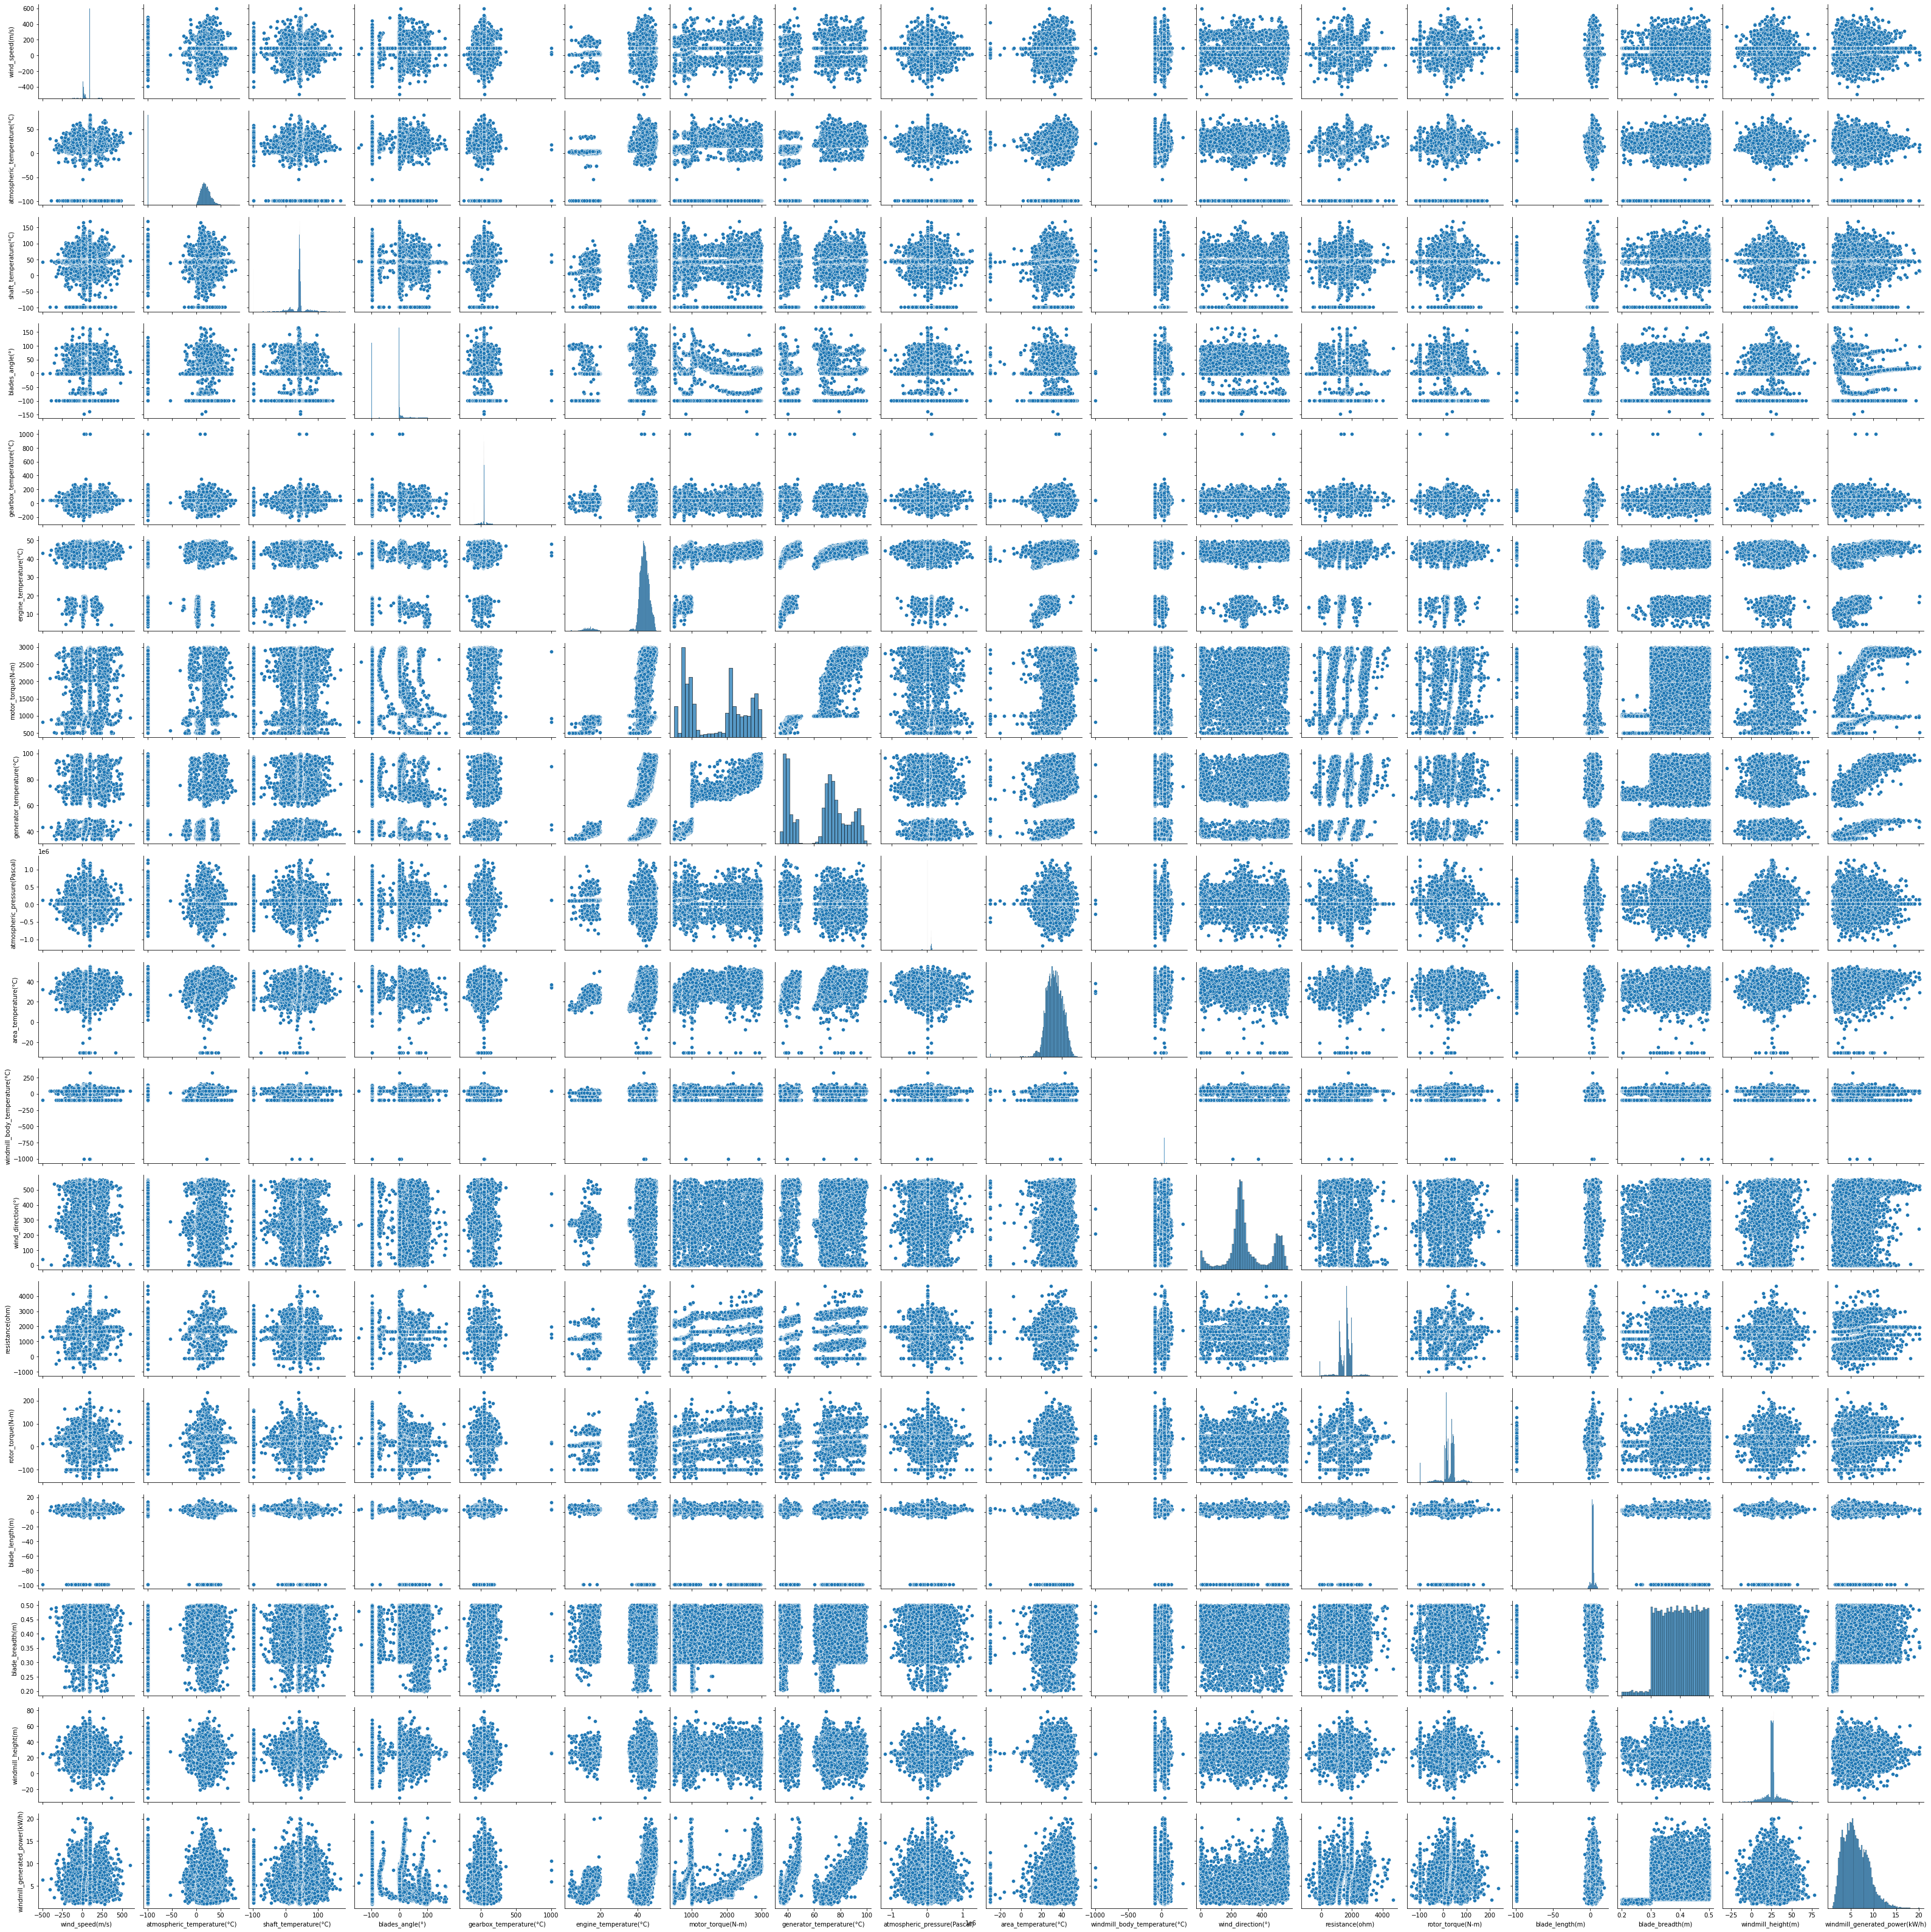

In [ ]:
sns.pairplot(data)  #pairplots for analysis data and cleaning it.

In [ ]:
#Defining functions specific to data columns for Data Cleaning

def imputer_bl(col):
    length = col[0]
    if pd.isnull(length) or length<0 :
        return 3.733551
    else:
        return length  
data['blade_length(m)'] = data[['blade_length(m)']].apply(imputer_bl,axis=1)
#replaced null values and negative values by mean of data.


def imputer_at(col):
    tem = col[0]
    list1 = [15.5,16,16.5,17,17.5,18,18.5,19.309101,19.309101,19.309101,19.309101,19.309101,20,20.5,21,21.5,22,22.5,23]
    if pd.isnull(tem) or tem<-30 :
        return random.choice(list1)
    else:
        return tem
data['atmospheric_temperature(°C)'] = data[['atmospheric_temperature(°C)']].apply(imputer_at,axis=1)



def imputer_wd(col):
    direc = col[0]
    list1 = [154.069540,154.069540,154.069540,155,160,165 ,230,235,240,245,250,255,260,265,270,275,268.222935,268.222935,268.222935, 234.647657,234.647657,234.647657,234.647657, 268.222935, 234.647657, 268.222935]
    if pd.isnull(direc) :
        return random.choice(list1)
    else:
        return direc%360
data['wind_direction(°)'] = data[['wind_direction(°)']].apply(imputer_wd,axis=1)



def imputer_ap(col):
    pres = col[0]
    list1 = [0,17987.68,16752.81,16752.81,117358.3,117358.3,117358.3]
    if pd.isnull(pres) :
        return random.choice(list1)
    else:
        return pres  
data['atmospheric_pressure(Pascal)'] = data[['atmospheric_pressure(Pascal)']].apply(imputer_ap,axis=1)



def imputer_wt(col):
    tem = col[0]
    list1 = [40.400389, 42.683445,42.683445, 44.475730,44.475730,44.475730]
    if pd.isnull(tem) or tem<-50 :
        return random.choice(list1)
    else:
        return tem   
data['windmill_body_temperature(°C)'] = data[['windmill_body_temperature(°C)']].apply(imputer_wt,axis=1)



def imputer_ts(col):
    code = col[0]
    list1 = ['BD', 'ABC', 'AC', 'BCB', 'BA', 'A2', 'AB', 'BBB', 'A', 'AAA', 'B','D', 'BB', 'B2']
    if pd.isnull(code) :
        return random.choice(list1)
    else:
        return code   
data['turbine_status'] = data[['turbine_status']].apply(imputer_ts,axis=1)



def imputer_wh(col):
    lens = col[0]
    list1 = [ 24.464973, 25.971587, 25.971587, 27.485170,27.485170,27.485170]
    if pd.isnull(lens) or lens<0 :
        return random.choice(list1)
    else:
        return lens   
data['windmill_height(m)'] = data[['windmill_height(m)']].apply(imputer_wh,axis=1)


#getting useful information from datetime column

data['date']=pd.to_datetime(data['datetime'])

data['year']=data['date'].dt.year
data['quarter'] = pd.DatetimeIndex(data['datetime']).quarter
data['month']=data['date'].dt.month
data['weekofyear']=data['date'].dt.isocalendar().week
data['dayofyear']=pd.DatetimeIndex(data['datetime']).dayofyear
data['day']=data['date'].dt.day
data['hour'] =data['date'].dt.hour
data['min']=data['date'].dt.minute
data['is_month_start']=pd.DatetimeIndex(data['datetime']).is_month_start.astype(int)
data['is_month_end']=pd.DatetimeIndex(data['datetime']).is_month_end.astype(int)



data.dropna(inplace=True) #droping null rows



#Encoding Categorical data

t_status = pd.get_dummies(data['turbine_status'],drop_first=True)
c_level = pd.get_dummies(data['cloud_level'],drop_first=True)

data = pd.concat([data,t_status,c_level], axis=1)
data.drop(columns = ['turbine_status', 'cloud_level','date','datetime'],axis=1, inplace=True)


In [ ]:
#segregating data into X and y
X = data.drop(columns=['windmill_generated_power(kW/h)'],axis=1).values()
y = data[['windmill_generated_power(kW/h)']].values()


#segregating training and testing data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=1)


#scaling the data 
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

TypeError: ignored

In [ ]:
#training and testing the model using RandomForrest

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

predictions= regressor.predict(X_test)

#calculating R2 score
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

<ipython-input-46-8a05d65dce0a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.966780707897957

In [ ]:
#training the model using voting regressor with Catboost, XGB, and LGBM

trial_cb=cb.CatBoostRegressor(eval_metric='R2',depth=9,iterations=1000)
trial_xgb=xgb.XGBRegressor(max_depth=9,learning_rate=0.01,n_estimators=1000,objective='reg:squarederror')
trial_lgbm=lgbm.LGBMRegressor(max_depth=9,learning_rate=0.01,n_estimators=1000,subsample=0.8)

trial=VotingRegressor(estimators=[('cb',trial_cb),('xgb',trial_xgb),('lgbm',trial_lgbm)])

trial.fit(X_train,y_train)

prediction=trial.predict(X_test)

#calculating R2 score
r2_score(y_test,prediction)

C:\Users\mudit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate set to 0.067302
0:	learn: 0.1061972	total: 54.2ms	remaining: 54.1s
1:	learn: 0.1980063	total: 80.1ms	remaining: 40s
2:	learn: 0.2745216	total: 103ms	remaining: 34.1s
3:	learn: 0.3519999	total: 125ms	remaining: 31.1s
4:	learn: 0.4176962	total: 147ms	remaining: 29.2s
5:	learn: 0.4779117	total: 169ms	remaining: 28s
6:	learn: 0.5287232	total: 195ms	remaining: 27.7s
7:	learn: 0.5737943	total: 231ms	remaining: 28.6s
8:	learn: 0.6147502	total: 255ms	remaining: 28.1s
9:	learn: 0.6472969	total: 280ms	remaining: 27.7s
10:	learn: 0.6815732	total: 303ms	remaining: 27.3s
11:	learn: 0.7060373	total: 328ms	remaining: 27s
12:	learn: 0.7322422	total: 353ms	remaining: 26.8s
13:	learn: 0.7551325	total: 376ms	remaining: 26.5s
14:	learn: 0.7755071	total: 404ms	remaining: 26.5s
15:	learn: 0.7938791	total: 429ms	remaining: 26.4s
16:	learn: 0.8090943	total: 454ms	remaining: 26.2s
17:	learn: 0.8220987	total: 480ms	remaining: 26.2s
18:	learn: 0.8354101	total: 504ms	remaining: 26s
19:	learn: 0.8462

162:	learn: 0.9728652	total: 4.39s	remaining: 22.5s
163:	learn: 0.9729669	total: 4.41s	remaining: 22.5s
164:	learn: 0.9730628	total: 4.43s	remaining: 22.4s
165:	learn: 0.9731719	total: 4.46s	remaining: 22.4s
166:	learn: 0.9732569	total: 4.49s	remaining: 22.4s
167:	learn: 0.9733621	total: 4.51s	remaining: 22.3s
168:	learn: 0.9734469	total: 4.54s	remaining: 22.3s
169:	learn: 0.9735306	total: 4.56s	remaining: 22.3s
170:	learn: 0.9736158	total: 4.59s	remaining: 22.3s
171:	learn: 0.9737243	total: 4.62s	remaining: 22.2s
172:	learn: 0.9738070	total: 4.64s	remaining: 22.2s
173:	learn: 0.9738927	total: 4.67s	remaining: 22.1s
174:	learn: 0.9739636	total: 4.69s	remaining: 22.1s
175:	learn: 0.9740679	total: 4.71s	remaining: 22.1s
176:	learn: 0.9741444	total: 4.74s	remaining: 22s
177:	learn: 0.9742509	total: 4.77s	remaining: 22s
178:	learn: 0.9743661	total: 4.79s	remaining: 22s
179:	learn: 0.9744320	total: 4.82s	remaining: 21.9s
180:	learn: 0.9745268	total: 4.84s	remaining: 21.9s
181:	learn: 0.9746

325:	learn: 0.9828245	total: 8.82s	remaining: 18.2s
326:	learn: 0.9828526	total: 8.84s	remaining: 18.2s
327:	learn: 0.9829015	total: 8.87s	remaining: 18.2s
328:	learn: 0.9829286	total: 8.89s	remaining: 18.1s
329:	learn: 0.9829548	total: 8.92s	remaining: 18.1s
330:	learn: 0.9829933	total: 8.94s	remaining: 18.1s
331:	learn: 0.9830178	total: 8.97s	remaining: 18s
332:	learn: 0.9830917	total: 8.99s	remaining: 18s
333:	learn: 0.9831356	total: 9.02s	remaining: 18s
334:	learn: 0.9832023	total: 9.05s	remaining: 18s
335:	learn: 0.9832516	total: 9.07s	remaining: 17.9s
336:	learn: 0.9832945	total: 9.1s	remaining: 17.9s
337:	learn: 0.9833292	total: 9.12s	remaining: 17.9s
338:	learn: 0.9833492	total: 9.15s	remaining: 17.8s
339:	learn: 0.9833976	total: 9.18s	remaining: 17.8s
340:	learn: 0.9834295	total: 9.2s	remaining: 17.8s
341:	learn: 0.9834572	total: 9.23s	remaining: 17.8s
342:	learn: 0.9834891	total: 9.26s	remaining: 17.7s
343:	learn: 0.9835364	total: 9.29s	remaining: 17.7s
344:	learn: 0.9835825	

489:	learn: 0.9875703	total: 13.4s	remaining: 13.9s
490:	learn: 0.9875870	total: 13.4s	remaining: 13.9s
491:	learn: 0.9875974	total: 13.4s	remaining: 13.9s
492:	learn: 0.9876298	total: 13.5s	remaining: 13.9s
493:	learn: 0.9876435	total: 13.5s	remaining: 13.8s
494:	learn: 0.9876611	total: 13.5s	remaining: 13.8s
495:	learn: 0.9876901	total: 13.6s	remaining: 13.8s
496:	learn: 0.9877131	total: 13.6s	remaining: 13.7s
497:	learn: 0.9877397	total: 13.6s	remaining: 13.7s
498:	learn: 0.9877620	total: 13.7s	remaining: 13.7s
499:	learn: 0.9877759	total: 13.7s	remaining: 13.7s
500:	learn: 0.9877933	total: 13.7s	remaining: 13.7s
501:	learn: 0.9878171	total: 13.7s	remaining: 13.6s
502:	learn: 0.9878281	total: 13.8s	remaining: 13.6s
503:	learn: 0.9878445	total: 13.8s	remaining: 13.6s
504:	learn: 0.9878715	total: 13.8s	remaining: 13.6s
505:	learn: 0.9878880	total: 13.9s	remaining: 13.5s
506:	learn: 0.9879053	total: 13.9s	remaining: 13.5s
507:	learn: 0.9879265	total: 13.9s	remaining: 13.5s
508:	learn: 

651:	learn: 0.9905857	total: 17.8s	remaining: 9.48s
652:	learn: 0.9905977	total: 17.8s	remaining: 9.46s
653:	learn: 0.9906107	total: 17.8s	remaining: 9.43s
654:	learn: 0.9906258	total: 17.9s	remaining: 9.4s
655:	learn: 0.9906387	total: 17.9s	remaining: 9.38s
656:	learn: 0.9906594	total: 17.9s	remaining: 9.35s
657:	learn: 0.9906700	total: 17.9s	remaining: 9.32s
658:	learn: 0.9906862	total: 18s	remaining: 9.29s
659:	learn: 0.9906990	total: 18s	remaining: 9.27s
660:	learn: 0.9907185	total: 18s	remaining: 9.24s
661:	learn: 0.9907280	total: 18s	remaining: 9.21s
662:	learn: 0.9907422	total: 18.1s	remaining: 9.18s
663:	learn: 0.9907627	total: 18.1s	remaining: 9.16s
664:	learn: 0.9907775	total: 18.1s	remaining: 9.13s
665:	learn: 0.9907904	total: 18.2s	remaining: 9.1s
666:	learn: 0.9908090	total: 18.2s	remaining: 9.07s
667:	learn: 0.9908213	total: 18.2s	remaining: 9.05s
668:	learn: 0.9908380	total: 18.2s	remaining: 9.02s
669:	learn: 0.9908498	total: 18.3s	remaining: 8.99s
670:	learn: 0.9908626	

813:	learn: 0.9926465	total: 22.4s	remaining: 5.12s
814:	learn: 0.9926557	total: 22.4s	remaining: 5.09s
815:	learn: 0.9926654	total: 22.5s	remaining: 5.07s
816:	learn: 0.9926771	total: 22.5s	remaining: 5.04s
817:	learn: 0.9926899	total: 22.5s	remaining: 5.01s
818:	learn: 0.9926976	total: 22.6s	remaining: 4.99s
819:	learn: 0.9927045	total: 22.6s	remaining: 4.96s
820:	learn: 0.9927126	total: 22.6s	remaining: 4.94s
821:	learn: 0.9927228	total: 22.7s	remaining: 4.91s
822:	learn: 0.9927301	total: 22.7s	remaining: 4.88s
823:	learn: 0.9927391	total: 22.7s	remaining: 4.86s
824:	learn: 0.9927504	total: 22.8s	remaining: 4.83s
825:	learn: 0.9927609	total: 22.8s	remaining: 4.81s
826:	learn: 0.9927678	total: 22.9s	remaining: 4.78s
827:	learn: 0.9927776	total: 22.9s	remaining: 4.75s
828:	learn: 0.9927865	total: 22.9s	remaining: 4.73s
829:	learn: 0.9927948	total: 23s	remaining: 4.7s
830:	learn: 0.9928040	total: 23s	remaining: 4.67s
831:	learn: 0.9928142	total: 23s	remaining: 4.65s
832:	learn: 0.99282

973:	learn: 0.9941037	total: 27.4s	remaining: 733ms
974:	learn: 0.9941093	total: 27.5s	remaining: 705ms
975:	learn: 0.9941156	total: 27.5s	remaining: 676ms
976:	learn: 0.9941259	total: 27.5s	remaining: 648ms
977:	learn: 0.9941345	total: 27.6s	remaining: 620ms
978:	learn: 0.9941432	total: 27.6s	remaining: 592ms
979:	learn: 0.9941509	total: 27.6s	remaining: 564ms
980:	learn: 0.9941578	total: 27.6s	remaining: 535ms
981:	learn: 0.9941654	total: 27.7s	remaining: 507ms
982:	learn: 0.9941730	total: 27.7s	remaining: 479ms
983:	learn: 0.9941809	total: 27.7s	remaining: 451ms
984:	learn: 0.9941864	total: 27.8s	remaining: 423ms
985:	learn: 0.9941926	total: 27.8s	remaining: 394ms
986:	learn: 0.9942018	total: 27.8s	remaining: 366ms
987:	learn: 0.9942092	total: 27.8s	remaining: 338ms
988:	learn: 0.9942168	total: 27.9s	remaining: 310ms
989:	learn: 0.9942245	total: 27.9s	remaining: 282ms
990:	learn: 0.9942300	total: 27.9s	remaining: 254ms
991:	learn: 0.9942343	total: 27.9s	remaining: 225ms
992:	learn: 

0.9702762200500454

In [ ]:
#Importing test files for contest submission

test_data=pd.read_csv('test.csv')
test_data.drop(columns=['tracking_id'], axis=1, inplace= True)



#Cleaning test data with the same functions and parameters

def imputer_bl(col):
    length = col[0]
    if pd.isnull(length) or length<0 :
        return 3.733551
    else:
        return length  
test_data['blade_length(m)'] = test_data[['blade_length(m)']].apply(imputer_bl,axis=1)



def imputer_at(col):
    tem = col[0]
    list1 = [15.5,16,16.5,17,17.5,18,18.5,19.309101,19.309101,19.309101,19.309101,19.309101,20,20.5,21,21.5,22,22.5,23]
    if pd.isnull(tem) or tem<-30 :
        return random.choice(list1)
    else:
        return tem
test_data['atmospheric_temperature(°C)'] = test_data[['atmospheric_temperature(°C)']].apply(imputer_at,axis=1)



def imputer_wd(col):
    direc = col[0]
    list1 = [154.069540,154.069540,154.069540,155,160,165 ,230,235,240,245,250,255,260,265,270,275,268.222935,268.222935,268.222935, 234.647657,234.647657,234.647657,234.647657, 268.222935, 234.647657, 268.222935]
    if pd.isnull(direc) :
        return random.choice(list1)
    else:
        return direc%360
test_data['wind_direction(°)'] = test_data[['wind_direction(°)']].apply(imputer_wd,axis=1)



def imputer_ap(col):
    pres = col[0]
    list1 = [0,17987.68,16752.81,16752.81,117358.3,117358.3,117358.3]
    if pd.isnull(pres) :
        return random.choice(list1)
    else:
        return pres   
test_data['atmospheric_pressure(Pascal)'] = test_data[['atmospheric_pressure(Pascal)']].apply(imputer_ap,axis=1)



def imputer_wt(col):
    tem = col[0]
    list1 = [40.400389, 42.683445,42.683445, 44.475730,44.475730,44.475730]
    if pd.isnull(tem) or tem<-50 :
        return random.choice(list1)
    else:
        return tem   
test_data['windmill_body_temperature(°C)'] = test_data[['windmill_body_temperature(°C)']].apply(imputer_wt,axis=1)



def imputer_ts(col):
    code = col[0]
    list1 = ['BD', 'ABC', 'AC', 'BCB', 'BA', 'A2', 'AB', 'BBB', 'A', 'AAA', 'B','D', 'BB', 'B2']
    if pd.isnull(code) :
        return random.choice(list1)
    else:
        return code    
test_data['turbine_status'] = test_data[['turbine_status']].apply(imputer_ts,axis=1)



def imputer_wh(col):
    lens = col[0]
    list1 = [ 24.464973, 25.971587, 25.971587, 27.485170,27.485170,27.485170]
    if pd.isnull(lens) or lens<0 :
        return random.choice(list1)
    else:
        return lens
test_data['windmill_height(m)'] = test_data[['windmill_height(m)']].apply(imputer_wh,axis=1)



def imputer_cl(col):
    level = col[0]
    list1 = ['Low', 'Extremely Low', 'Medium']
    if pd.isnull(level) :
        return random.choice(list1)
    else:
        return level    
test_data['cloud_level'] = test_data[['cloud_level']].apply(imputer_cl,axis=1)


test_data['date']=pd.to_datetime(test_data['datetime'])

test_data['year']=test_data['date'].dt.year
test_data['quarter'] = pd.DatetimeIndex(test_data['datetime']).quarter
test_data['month']=test_data['date'].dt.month
test_data['weekofyear']=test_data['date'].dt.isocalendar().week
test_data['dayofyear']=pd.DatetimeIndex(test_data['datetime']).dayofyear
test_data['day']=test_data['date'].dt.day
test_data['hour'] =test_data['date'].dt.hour
test_data['min']=test_data['date'].dt.minute
test_data['is_month_start']=pd.DatetimeIndex(test_data['datetime']).is_month_start.astype(int)
test_data['is_month_end']=pd.DatetimeIndex(test_data['datetime']).is_month_end.astype(int)


test_data.drop(columns = ['date','datetime'],axis=1, inplace=True)


#filing remaining null values with mean values
test_data.fillna(value=test_data.mean(),inplace=True)


#performing endoing on categorical columns
t_status = pd.get_dummies(test_data['turbine_status'],drop_first=True)
c_level = pd.get_dummies(test_data['cloud_level'],drop_first=True)

test_data = pd.concat([test_data,t_status,c_level], axis=1)
test_data.drop(columns = ['turbine_status', 'cloud_level'],axis=1, inplace=True)

In [ ]:
#scaling and training the model again for submission of contest
X=ss.fit_transform(X)
test_data=ss.transform(test_data)
trial.fit(X,y)
prediction=trial.predict(test_data)

C:\Users\mudit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate set to 0.070029
0:	learn: 0.1134701	total: 36ms	remaining: 36s
1:	learn: 0.2075412	total: 58.5ms	remaining: 29.2s
2:	learn: 0.2864271	total: 80.3ms	remaining: 26.7s
3:	learn: 0.3654692	total: 102ms	remaining: 25.5s
4:	learn: 0.4323363	total: 125ms	remaining: 24.9s
5:	learn: 0.4936943	total: 148ms	remaining: 24.5s
6:	learn: 0.5466153	total: 172ms	remaining: 24.4s
7:	learn: 0.5912331	total: 200ms	remaining: 24.8s
8:	learn: 0.6324304	total: 226ms	remaining: 24.9s
9:	learn: 0.6644895	total: 253ms	remaining: 25.1s
10:	learn: 0.6967058	total: 278ms	remaining: 25s
11:	learn: 0.7205650	total: 301ms	remaining: 24.8s
12:	learn: 0.7460995	total: 327ms	remaining: 24.8s
13:	learn: 0.7674288	total: 351ms	remaining: 24.7s
14:	learn: 0.7864679	total: 376ms	remaining: 24.7s
15:	learn: 0.8040036	total: 408ms	remaining: 25.1s
16:	learn: 0.8190124	total: 434ms	remaining: 25.1s
17:	learn: 0.8330265	total: 460ms	remaining: 25.1s
18:	learn: 0.8452288	total: 485ms	remaining: 25.1s
19:	learn: 0.8

165:	learn: 0.9733759	total: 4.26s	remaining: 21.4s
166:	learn: 0.9734867	total: 4.28s	remaining: 21.4s
167:	learn: 0.9736045	total: 4.31s	remaining: 21.3s
168:	learn: 0.9737045	total: 4.33s	remaining: 21.3s
169:	learn: 0.9737794	total: 4.36s	remaining: 21.3s
170:	learn: 0.9738653	total: 4.38s	remaining: 21.2s
171:	learn: 0.9739306	total: 4.41s	remaining: 21.2s
172:	learn: 0.9740239	total: 4.43s	remaining: 21.2s
173:	learn: 0.9741525	total: 4.46s	remaining: 21.2s
174:	learn: 0.9742622	total: 4.49s	remaining: 21.1s
175:	learn: 0.9743655	total: 4.51s	remaining: 21.1s
176:	learn: 0.9744450	total: 4.54s	remaining: 21.1s
177:	learn: 0.9744978	total: 4.56s	remaining: 21.1s
178:	learn: 0.9745692	total: 4.59s	remaining: 21s
179:	learn: 0.9746660	total: 4.61s	remaining: 21s
180:	learn: 0.9747808	total: 4.64s	remaining: 21s
181:	learn: 0.9748571	total: 4.67s	remaining: 21s
182:	learn: 0.9749496	total: 4.69s	remaining: 21s
183:	learn: 0.9750375	total: 4.72s	remaining: 20.9s
184:	learn: 0.9750939	

326:	learn: 0.9825742	total: 8.36s	remaining: 17.2s
327:	learn: 0.9826152	total: 8.39s	remaining: 17.2s
328:	learn: 0.9826471	total: 8.41s	remaining: 17.2s
329:	learn: 0.9826676	total: 8.44s	remaining: 17.1s
330:	learn: 0.9827110	total: 8.46s	remaining: 17.1s
331:	learn: 0.9827455	total: 8.49s	remaining: 17.1s
332:	learn: 0.9828047	total: 8.51s	remaining: 17.1s
333:	learn: 0.9828287	total: 8.54s	remaining: 17s
334:	learn: 0.9828610	total: 8.56s	remaining: 17s
335:	learn: 0.9828825	total: 8.59s	remaining: 17s
336:	learn: 0.9829225	total: 8.61s	remaining: 16.9s
337:	learn: 0.9829750	total: 8.64s	remaining: 16.9s
338:	learn: 0.9830176	total: 8.66s	remaining: 16.9s
339:	learn: 0.9830543	total: 8.69s	remaining: 16.9s
340:	learn: 0.9830902	total: 8.72s	remaining: 16.8s
341:	learn: 0.9831181	total: 8.74s	remaining: 16.8s
342:	learn: 0.9831564	total: 8.77s	remaining: 16.8s
343:	learn: 0.9831868	total: 8.8s	remaining: 16.8s
344:	learn: 0.9832391	total: 8.82s	remaining: 16.8s
345:	learn: 0.98327

487:	learn: 0.9870381	total: 12.6s	remaining: 13.2s
488:	learn: 0.9870482	total: 12.6s	remaining: 13.2s
489:	learn: 0.9870685	total: 12.7s	remaining: 13.2s
490:	learn: 0.9870938	total: 12.7s	remaining: 13.2s
491:	learn: 0.9871186	total: 12.7s	remaining: 13.1s
492:	learn: 0.9871393	total: 12.7s	remaining: 13.1s
493:	learn: 0.9871517	total: 12.8s	remaining: 13.1s
494:	learn: 0.9871711	total: 12.8s	remaining: 13.1s
495:	learn: 0.9871844	total: 12.8s	remaining: 13s
496:	learn: 0.9872183	total: 12.8s	remaining: 13s
497:	learn: 0.9872444	total: 12.9s	remaining: 13s
498:	learn: 0.9872693	total: 12.9s	remaining: 12.9s
499:	learn: 0.9872893	total: 12.9s	remaining: 12.9s
500:	learn: 0.9873120	total: 12.9s	remaining: 12.9s
501:	learn: 0.9873373	total: 13s	remaining: 12.9s
502:	learn: 0.9873593	total: 13s	remaining: 12.8s
503:	learn: 0.9873771	total: 13s	remaining: 12.8s
504:	learn: 0.9873933	total: 13.1s	remaining: 12.8s
505:	learn: 0.9874109	total: 13.1s	remaining: 12.8s
506:	learn: 0.9874296	to

648:	learn: 0.9899789	total: 16.8s	remaining: 9.07s
649:	learn: 0.9899895	total: 16.8s	remaining: 9.05s
650:	learn: 0.9900021	total: 16.8s	remaining: 9.02s
651:	learn: 0.9900124	total: 16.9s	remaining: 9s
652:	learn: 0.9900306	total: 16.9s	remaining: 8.97s
653:	learn: 0.9900480	total: 16.9s	remaining: 8.95s
654:	learn: 0.9900601	total: 16.9s	remaining: 8.92s
655:	learn: 0.9900744	total: 17s	remaining: 8.89s
656:	learn: 0.9900969	total: 17s	remaining: 8.87s
657:	learn: 0.9901095	total: 17s	remaining: 8.84s
658:	learn: 0.9901210	total: 17s	remaining: 8.82s
659:	learn: 0.9901306	total: 17.1s	remaining: 8.79s
660:	learn: 0.9901444	total: 17.1s	remaining: 8.77s
661:	learn: 0.9901533	total: 17.1s	remaining: 8.74s
662:	learn: 0.9901643	total: 17.1s	remaining: 8.71s
663:	learn: 0.9901771	total: 17.2s	remaining: 8.69s
664:	learn: 0.9901966	total: 17.2s	remaining: 8.66s
665:	learn: 0.9902100	total: 17.2s	remaining: 8.63s
666:	learn: 0.9902270	total: 17.2s	remaining: 8.61s
667:	learn: 0.9902396	t

812:	learn: 0.9920477	total: 21.1s	remaining: 4.85s
813:	learn: 0.9920588	total: 21.1s	remaining: 4.83s
814:	learn: 0.9920713	total: 21.1s	remaining: 4.8s
815:	learn: 0.9920772	total: 21.2s	remaining: 4.77s
816:	learn: 0.9920883	total: 21.2s	remaining: 4.75s
817:	learn: 0.9920929	total: 21.2s	remaining: 4.72s
818:	learn: 0.9921002	total: 21.2s	remaining: 4.7s
819:	learn: 0.9921119	total: 21.3s	remaining: 4.67s
820:	learn: 0.9921280	total: 21.3s	remaining: 4.64s
821:	learn: 0.9921373	total: 21.3s	remaining: 4.62s
822:	learn: 0.9921503	total: 21.4s	remaining: 4.59s
823:	learn: 0.9921576	total: 21.4s	remaining: 4.57s
824:	learn: 0.9921663	total: 21.4s	remaining: 4.54s
825:	learn: 0.9921756	total: 21.4s	remaining: 4.51s
826:	learn: 0.9921874	total: 21.5s	remaining: 4.49s
827:	learn: 0.9922000	total: 21.5s	remaining: 4.46s
828:	learn: 0.9922107	total: 21.5s	remaining: 4.44s
829:	learn: 0.9922203	total: 21.5s	remaining: 4.41s
830:	learn: 0.9922310	total: 21.6s	remaining: 4.39s
831:	learn: 0.

971:	learn: 0.9935084	total: 25.4s	remaining: 732ms
972:	learn: 0.9935153	total: 25.5s	remaining: 706ms
973:	learn: 0.9935213	total: 25.5s	remaining: 680ms
974:	learn: 0.9935283	total: 25.5s	remaining: 654ms
975:	learn: 0.9935383	total: 25.5s	remaining: 628ms
976:	learn: 0.9935487	total: 25.6s	remaining: 602ms
977:	learn: 0.9935583	total: 25.6s	remaining: 575ms
978:	learn: 0.9935643	total: 25.6s	remaining: 549ms
979:	learn: 0.9935700	total: 25.6s	remaining: 523ms
980:	learn: 0.9935758	total: 25.7s	remaining: 497ms
981:	learn: 0.9935881	total: 25.7s	remaining: 471ms
982:	learn: 0.9935955	total: 25.7s	remaining: 445ms
983:	learn: 0.9936023	total: 25.7s	remaining: 419ms
984:	learn: 0.9936087	total: 25.8s	remaining: 392ms
985:	learn: 0.9936160	total: 25.8s	remaining: 366ms
986:	learn: 0.9936256	total: 25.8s	remaining: 340ms
987:	learn: 0.9936331	total: 25.8s	remaining: 314ms
988:	learn: 0.9936423	total: 25.9s	remaining: 288ms
989:	learn: 0.9936478	total: 25.9s	remaining: 262ms
990:	learn: 

In [ ]:
#saving the predictions to submit for the contest
df = pd.DataFrame(prediction,columns=['windmill_generated_power(kW/h)'])
test = pd.read_csv('test.csv')
dff = test[['tracking_id','datetime']]
dff['windmill_generated_power(kW/h)'] = df
dff.to_csv('sub.csv',index=False)

<ipython-input-29-c92a29be9b08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['windmill_generated_power(kW/h)'] = df


My score for this submission was 97.096